<a href="https://colab.research.google.com/github/MalayGain/Deep-Learning-/blob/main/Gradient_Class_Activation_Mapping_of_CNN_on_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
 import tensorflow as tf
 from tensorflow.keras import datasets, layers, models
 import matplotlib.pyplot as plt
 import numpy as np

In [7]:
(X_train, Y_train), (X_test, Y_test) =datasets.cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

In [4]:
Y_train.shape
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:

classes=["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

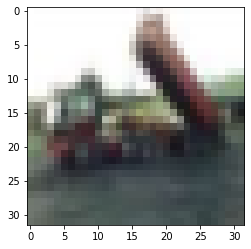

In [7]:
#X_train[2].shape
#plt.figure(figsize=(5,2))
plt.imshow(X_train[2])
#plt.xlabel(classes[Y_train[2][0]])

In [20]:
#normalizining  data pixel vales [r,g,b]

X_train=X_train/255
X_test=X_test/255
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

## CNN

In [21]:
Y_train=Y_train.reshape(-1)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
cnn.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4906 - accuracy: 0.4630
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1317 - accuracy: 0.6030
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0000 - accuracy: 0.6513
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9162 - accuracy: 0.6800
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8512 - accuracy: 0.7044


In [25]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9264 - accuracy: 0.6815


[0.9264266490936279, 0.6815000176429749]

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[9.42021515e-03, 1.25034276e-04, 1.23780249e-02, 4.83174056e-01,
        3.27033078e-04, 3.16259354e-01, 6.90394267e-03, 5.20159228e-05,
        1.70517907e-01, 8.42443027e-04],
       [1.49203436e-02, 2.95204341e-01, 4.59270304e-05, 1.20964505e-05,
        9.48570778e-06, 3.79637527e-07, 2.12350869e-06, 1.09711152e-06,
        6.76642239e-01, 1.31619731e-02],
       [1.19399592e-01, 2.58502960e-01, 4.95293457e-03, 2.13131146e-03,
        7.30086293e-04, 2.75750790e-04, 1.77973401e-04, 1.02434889e-03,
        6.01960659e-01, 1.08444449e-02],
       [7.86504447e-01, 1.00474067e-01, 2.39814706e-02, 3.04787274e-04,
        7.60898972e-03, 4.12413901e-05, 2.39573870e-04, 2.42485548e-04,
        8.00148025e-02, 5.88143710e-04],
       [2.02390904e-04, 1.63675752e-04, 1.53018199e-02, 6.06423765e-02,
        3.65999758e-01, 8.88887979e-03, 5.48535407e-01, 1.67056845e-04,
        5.50280129e-05, 4.35605580e-05]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [28]:
y_test=Y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report :\n",classification_report(y_test,y_classes))

Classification report :
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.71      0.87      0.78      1000
           2       0.54      0.58      0.56      1000
           3       0.57      0.41      0.48      1000
           4       0.63      0.62      0.63      1000
           5       0.59      0.61      0.60      1000
           6       0.69      0.82      0.75      1000
           7       0.81      0.66      0.73      1000
           8       0.80      0.76      0.78      1000
           9       0.76      0.73      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [30]:
cm=confusion_matrix(y_test,y_classes)

Text(33.0, 0.5, 'Truth')

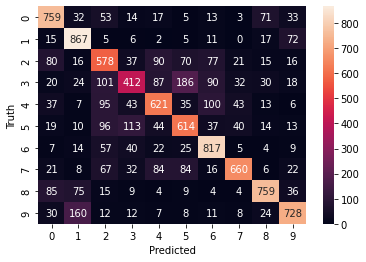

In [31]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

# Gradient Class Activation Mapping (Grad CAMs)

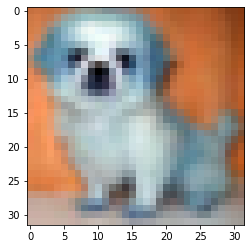

In [33]:
# import the necessary packages
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model

import tensorflow as tf

import numpy as np
import imutils
import cv2



# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread("/dog4.png")
plt.imshow(orig)

In [34]:


# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = load_img("/dog4.png", target_size=(32,32))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
# use the network to make predictions on the input image and find
# the class label index with the largest corresponding probability
preds = cnn.predict(image)
i = np.argmax(preds[0])
label=classes[i] # dog
print("predicted label : ",label)



predicted label :  dog


In [36]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output.shape) == 4:
                return layer.name

        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

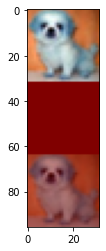

In [37]:
# initialize our gradient class activation map and build the heatmap
cam = GradCAM(cnn, i)

heatmap = cam.compute_heatmap(image)

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)



# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])


plt.imshow( output)


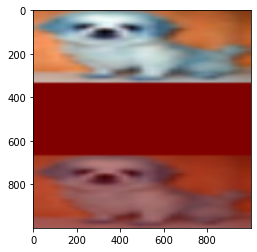

In [41]:

resized = cv2.resize(output, (1000, 1000))
plt.imshow(resized)

